# Clonar o repositório

## Gerar SSH 

Precisa adicionar o código gerado na última célula na conta do github para funcionar (settings -> SSH and GPG Keys -> New SSH key)

In [ ]:
!ssh-keygen -t rsa -b 4096

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [ ]:
!cat /root/.ssh/id_rsa.pub

## Clonar e entrar na pasta do repositório

In [ ]:
!git clone git@github.com:robert-abc/helsinki.git --branch development

In [5]:
%cd helsinki

/content/helsinki


## Connect with google drive to access the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Treinar

## Quando não tem os resultados do DIP e quer gerá-los, salvá-los e em seguida treinar o autoencoder

* 1º argumento: pasta com imagens blur
* 2º argumento: pasta com imagens sharp
* 3º argumento: pasta para salvar os pesos do treino
* 4º argumento: level de blur
* 5º argumento: --save_intermediary <pasta para salvar os resultados do DIP>

In [ ]:
!python train_weights.py /content/drive/MyDrive/Deblur/15/CAM02 /content/drive/MyDrive/Deblur/15/CAM01 weights 15 --save_intermediary /content/drive/MyDrive/Deblur/15/res

## Quando já tem os resultados do DIP e só quer treinar o autoencoder

* 1º argumento: pasta com imagens blur
* 2º argumento: pasta com imagens sharp
* 3º argumento: pasta para salvar os pesos do treino
* 4º argumento: level de blur
* 5º argumento: --have_intermediary <pasta onde estão os resultados do DIP>

In [8]:
!python train_weights.py /content/drive/MyDrive/Deblur/15/CAM02 /content/drive/MyDrive/Deblur/15/CAM01 weights 15 --have_intermediary /content/drive/MyDrive/Deblur/15/res

73 images were found.
tcmalloc: large alloc 1114112000 bytes == 0x55a4af462000 @  0x7f61d0c761e7 0x7f61ce0e346e 0x7f61ce133c7b 0x7f61ce133d18 0x7f61ce1db010 0x7f61ce1db73c 0x7f61ce1db85d 0x55a3a98ba749 0x7f61ce120ef7 0x55a3a98b8437 0x55a3a98b8240 0x55a3a992b973 0x55a3a99269ee 0x55a3a98b9bda 0x55a3a9928737 0x55a3a99269ee 0x55a3a99266f3 0x55a3a99f04c2 0x55a3a99f083d 0x55a3a99f06e6 0x55a3a99c8163 0x55a3a99c7e0c 0x7f61cfa60bf7 0x55a3a99c7cea
2021-09-29 16:27:14.065054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 16:27:14.404086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 16:27:14.404753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from

# Visualização dos resultados

In [9]:
from utils import autoencoder_tools
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [38]:
weight_path='weights/weights_15.h5' # path to weight
autoencoder=autoencoder_tools.get_nn(weight_path)

In [37]:
in_name=os.listdir('examples/autoencoder')
r=re.compile(".*npy")
in_name=list(filter(r.match,in_name))[0]

img=np.load(os.path.join('examples/autoencoder',in_name))

In [39]:
out=autoencoder_tools.get_dl_estim(img[0],autoencoder)

In [20]:
def multiplot(imgs,titles=['DIP Output','Autoencoder Output']):
  plt.figure(figsize=[14,6])
  for i in range(len(imgs)):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show();

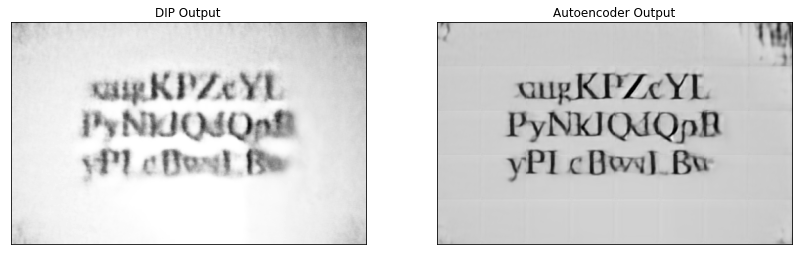

In [40]:
multiplot([img[0],out])